<h2>Introduction</h2>
<br>
Welcome to this new notebook, where I'm playing around with the Tensorflow Estimator API.
<br>
<br>
The goal is to predict the Median House Value, given many features.
We will be testing two different models
<br>
<br>
Regression problem, let's dive into it !

<b>Importing libraries</b>

In [16]:
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from math import sqrt

import matplotlib.pyplot as plt

%matplotlib inline

<b>Reading the dataset</b>

In [3]:
df = pd.read_csv('cal_housing_clean.csv')

In [4]:
df.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


<b>Let's check the histograms</b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259F0EA39E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000259F1383828>]], dtype=object)

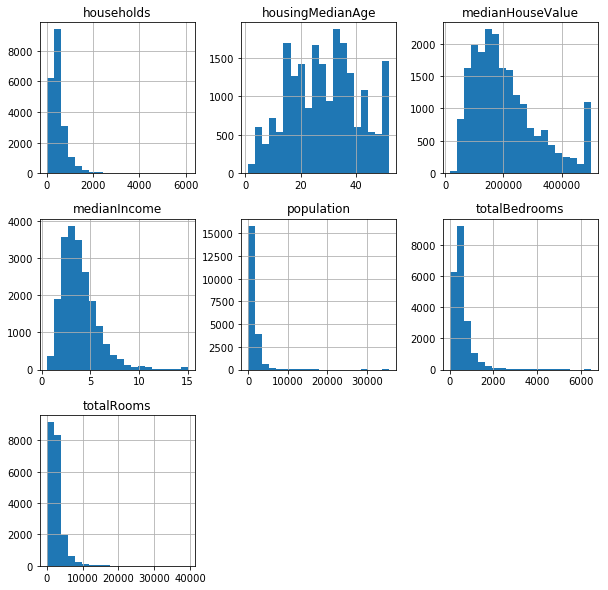

In [13]:
df.hist(bins=20, figsize=(10,10))

<b>We can see that the features' ranges are quite differently scaled, so we definitely need to normalize our data<b>

In [15]:
minmax = MinMaxScaler()

In [17]:
df.columns.tolist()

['housingMedianAge',
 'totalRooms',
 'totalBedrooms',
 'population',
 'households',
 'medianIncome',
 'medianHouseValue']

In [18]:
x = df.drop('medianHouseValue', axis=1)
y = df['medianHouseValue']

<b>Splitting our train and test datasets</b>

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [77]:
x_cols = x_train.columns.tolist()
x_train_indexes = x_train.index
x_test_indexes = x_test.index

In [78]:
x_train = minmax.fit_transform(x_train)

In [79]:
x_train = pd.DataFrame(data=x_train, columns=x_cols, index=x_train_indexes)

In [80]:
x_train.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
6761,0.352941,0.069688,0.117163,0.048769,0.115442,0.142508
3010,0.607843,0.011242,0.015673,0.008367,0.014142,0.045027
7812,0.666667,0.025230,0.031347,0.020971,0.030258,0.212866
8480,0.666667,0.032530,0.033830,0.024752,0.030094,0.298651
1051,0.294118,0.031919,0.035692,0.019466,0.034863,0.272631


<b>Now our train dataset is normalized, let's do the same for the test dataset</b>

In [81]:
x_test = minmax.fit_transform(x_test)
x_test = pd.DataFrame(data=x_test, columns=x_cols, index=x_test_indexes)

<b>Creating the feature columns for our TF models</b>

In [82]:
housingMedianAge = tf.feature_column.numeric_column('housingMedianAge')
totalRooms = tf.feature_column.numeric_column('totalRooms')
totalBedrooms = tf.feature_column.numeric_column('totalBedrooms')
population = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
medianIncome = tf.feature_column.numeric_column('medianIncome')

In [83]:
feat_cols = [housingMedianAge, totalRooms, totalBedrooms,population,households,medianIncome]

<b>Creating the train and predict input functions</b>

In [96]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,shuffle=True,\
                                                 num_epochs=10000,\
                                                batch_size=10)

In [97]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x_test,shuffle=False,\
                                                 num_epochs=1)

<b>For this case, we'll try two different options</b>
- A Dense Neural Network Regressor
- A Linear Regressor
<br>

<b>Let's first create and evaluate the DNN model</b>

In [98]:
dnn_model = tf.estimator.DNNRegressor([6,6,6,6,6],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Yassine\\AppData\\Local\\Temp\\tmpnt2t416s', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_summary_steps': 100, '_log_step_count_steps': 100}


<b>Training the model</b>

In [99]:
dnn_model.train(input_fn=input_func, steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Yassine\AppData\Local\Temp\tmpnt2t416s\model.ckpt.
INFO:tensorflow:loss = 5.12445e+11, step = 1
INFO:tensorflow:global_step/sec: 354.922
INFO:tensorflow:loss = 2.18842e+11, step = 101 (0.285 sec)
INFO:tensorflow:global_step/sec: 214.737
INFO:tensorflow:loss = 8.58017e+10, step = 201 (0.473 sec)
INFO:tensorflow:global_step/sec: 281.266
INFO:tensorflow:loss = 2.2534e+11, step = 301 (0.349 sec)
INFO:tensorflow:global_step/sec: 381.842
INFO:tensorflow:loss = 1.05748e+11, step = 401 (0.260 sec)
INFO:tensorflow:global_step/sec: 393.852
INFO:tensorflow:loss = 4.13981e+10, step = 501 (0.255 sec)
INFO:tensorflow:global_step/sec: 302.578
INFO:tensorflow:loss = 1.12726e+11, step = 601 (0.333 sec)
INFO:tensorflow:global_step/sec: 264.862
INFO:tensorflow:loss = 1.22022e+11, step = 701 (0.374 sec)
INFO:tensorflow:global_step/sec: 324.211
INFO:tensorflow:loss = 1.60445e+11, step = 801 (0.311 sec)
INFO:t

INFO:tensorflow:global_step/sec: 251.283
INFO:tensorflow:loss = 3.24793e+10, step = 8101 (0.388 sec)
INFO:tensorflow:global_step/sec: 321.289
INFO:tensorflow:loss = 1.42128e+11, step = 8201 (0.306 sec)
INFO:tensorflow:global_step/sec: 351.267
INFO:tensorflow:loss = 1.61049e+11, step = 8301 (0.287 sec)
INFO:tensorflow:global_step/sec: 327.081
INFO:tensorflow:loss = 2.58913e+10, step = 8401 (0.307 sec)
INFO:tensorflow:global_step/sec: 306.952
INFO:tensorflow:loss = 5.00323e+10, step = 8501 (0.322 sec)
INFO:tensorflow:global_step/sec: 380.763
INFO:tensorflow:loss = 2.59464e+10, step = 8601 (0.263 sec)
INFO:tensorflow:global_step/sec: 226.466
INFO:tensorflow:loss = 1.06798e+11, step = 8701 (0.458 sec)
INFO:tensorflow:global_step/sec: 275.965
INFO:tensorflow:loss = 2.45921e+10, step = 8801 (0.347 sec)
INFO:tensorflow:global_step/sec: 396.661
INFO:tensorflow:loss = 2.59331e+10, step = 8901 (0.252 sec)
INFO:tensorflow:global_step/sec: 402.256
INFO:tensorflow:loss = 9.51727e+10, step = 9001 (0

<b>Evaluating the model</b>

In [100]:
predictions = []

for pred in list(dnn_model.predict(input_fn=predict_input_func)):
    
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Yassine\AppData\Local\Temp\tmpnt2t416s\model.ckpt-10000


In [101]:
rms = sqrt(mean_squared_error(y_test, predictions))

In [102]:
rms

82752.54471460344

<b>Now, let's try the Linear Regressor to compare</b>

In [103]:
linear_regressor = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Yassine\\AppData\\Local\\Temp\\tmp49iahg9h', '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_summary_steps': 100, '_log_step_count_steps': 100}


In [104]:
linear_regressor.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Yassine\AppData\Local\Temp\tmp49iahg9h\model.ckpt.
INFO:tensorflow:loss = 2.56799e+11, step = 1
INFO:tensorflow:global_step/sec: 391.17
INFO:tensorflow:loss = 5.55317e+11, step = 101 (0.263 sec)
INFO:tensorflow:global_step/sec: 394.712
INFO:tensorflow:loss = 6.06187e+11, step = 201 (0.254 sec)
INFO:tensorflow:global_step/sec: 413.399
INFO:tensorflow:loss = 3.38159e+11, step = 301 (0.248 sec)
INFO:tensorflow:global_step/sec: 408.892
INFO:tensorflow:loss = 9.9131e+11, step = 401 (0.239 sec)
INFO:tensorflow:global_step/sec: 410.491
INFO:tensorflow:loss = 4.89424e+11, step = 501 (0.245 sec)
INFO:tensorflow:global_step/sec: 344.949
INFO:tensorflow:loss = 4.69638e+11, step = 601 (0.288 sec)
INFO:tensorflow:global_step/sec: 394.217
INFO:tensorflow:loss = 5.18501e+11, step = 701 (0.250 sec)
INFO:tensorflow:global_step/sec: 427.23
INFO:tensorflow:loss = 2.83856e+11, step = 801 (0.229 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 394.797
INFO:tensorflow:loss = 5.30947e+11, step = 8101 (0.238 sec)
INFO:tensorflow:global_step/sec: 463.287
INFO:tensorflow:loss = 1.03621e+12, step = 8201 (0.216 sec)
INFO:tensorflow:global_step/sec: 456.098
INFO:tensorflow:loss = 5.40185e+11, step = 8301 (0.235 sec)
INFO:tensorflow:global_step/sec: 411.142
INFO:tensorflow:loss = 5.14475e+11, step = 8401 (0.234 sec)
INFO:tensorflow:global_step/sec: 484.284
INFO:tensorflow:loss = 3.95601e+11, step = 8501 (0.228 sec)
INFO:tensorflow:global_step/sec: 433.491
INFO:tensorflow:loss = 3.27013e+11, step = 8601 (0.203 sec)
INFO:tensorflow:global_step/sec: 450.544
INFO:tensorflow:loss = 4.8292e+11, step = 8701 (0.238 sec)
INFO:tensorflow:global_step/sec: 413.744
INFO:tensorflow:loss = 3.43671e+11, step = 8801 (0.232 sec)
INFO:tensorflow:global_step/sec: 486.344
INFO:tensorflow:loss = 6.32262e+11, step = 8901 (0.224 sec)
INFO:tensorflow:global_step/sec: 432.029
INFO:tensorflow:loss = 6.02241e+11, step = 9001 (0.

In [105]:
linear_predictions = []

for pred in list(linear_regressor.predict(input_fn=predict_input_func)):
    
    linear_predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Yassine\AppData\Local\Temp\tmp49iahg9h\model.ckpt-10000


In [107]:
linear_rmse = sqrt(mean_squared_error(y_true=y_test, y_pred=linear_predictions))

In [108]:
linear_rmse

237951.4378283516

<h2>Conclusion</h2>
<br>
We can notice that the DNN is performing way better than the TF Linear regressor.
<br>
But we still can improve the DNN's performance by :
- Adding more data
- Increasing the training steps
- Increasing the number of layers/neurons per layer